<a href="https://colab.research.google.com/github/Shantanuh10/Ted-Talk-Views-Prediction-Project/blob/main/Capstone_project_2_Ted_Talks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**<font size="+3" color='#053c40'><b> $Ted$ $Talk$ $Views$ $Prediction$ </b></font>**


---


#<font size="+2" color='#053c96'><b> About this Project </b></font>

This is a Machine Learning Capstone Project, which is part of AlmaBetter's Data Science Pro Program Curriculum.



---




#<font size="+2" color='#053c96'><b> Problem Statement </b></font>

TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages.


Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates.

The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.





---

#<font size="+2" color='#053c96'><b> Dataset Information </b></font>


*   Number of instances: 4,005
*   Number of attributes: 19

---

#<font size="+2" color='#053c96'><b> Understanding the Data </b></font>

The dataset contains features like:

* talk_id: Talk identification number provided by TED

* title: Title of the talk

* speaker_1: First speaker in TED's speaker list

* all_speakers: Speakers in the talk

* occupations: Occupations of the speakers

* about_speakers: Blurb about each speaker

* recorded_date: Date the talk was recorded

* published_date: Date the talk was published to TED.com

* event: Event or medium in which the talk was given

* native_lang: Language the talk was given in

* available_lang: All available languages (lang_code) for a talk

* comments: Count of comments

* duration: Duration in seconds

* topics: Related tags or topics for the talk

* related_talks: Related talks (key='talk_id',value='title')

* url: URL of the talk

* description: Description of the talk

* transcript: Full transcript of the talk

---
**Target Variable :**

* 'views': Count of views

**Goal: The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.**
#<font size="+2" color='#053c96'><b> Project Workflow </b></font>

1. Importing Libraries

2. Loading the Dataset

3. EDA on features 

4. Feature Engineering

5. Data Cleaning

6. Feature selection

7. Fitting the regression models and HyperParameter Tuning

8. Comparison of Models

9. Final selection of the model

10. Conclusion
--- 



# **1. Importing Libraries**

In [2]:
#importing the libraries
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
import time
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble

import warnings
warnings.filterwarnings('ignore')

# **2. Loading the dataset**

In [3]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#loading the data file and creating a dataframe
path='/content/drive/MyDrive/Capstone Project (AlmaBetter)/Project - 2 Ted Talks  Views Prediction /data_ted_talks.csv'
df=pd.read_csv(path)

# **3. Exploratory Data Analysis**

In [5]:
#let's print the shape of the dataset.
df.shape

(4005, 19)

* No of records: 4005

* No of columns: 19

* Target Variable: 'views

In [6]:
#printing the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

* In this dataset, we have only 3 numerical columns out of which 1 is our target variable and 2 can be used as features and rest all columns are either categorical or they contains textual data.

* So, our main goal here is to find or generate some numerical columns from these columns.

In [7]:
#printing the head of the dataset
df.head(2)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."


**Checking for duplicate rows**

In [8]:
#checking for duplicacy in the dataset
df.duplicated().sum()

0

**The dataset doesn't contain any duplicate rows**

**3.1 Checking Null Values**

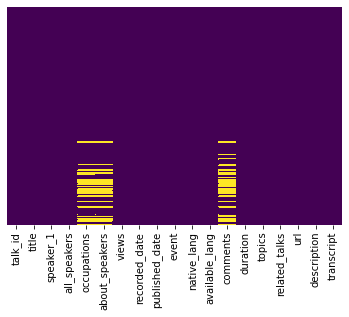

In [9]:
#checking the missing data in the dataset
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.rcParams['figure.figsize'] = (20, 8)

The dataset contains NaN values in few columns like:

* all_speakers

* occupations

* about_speakers

* comments

* recorded_date

In [10]:
#checking for NaN values
df.isna().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

**Dropping the url column as it is of no use for us**

In [11]:
#dropping the url column
df=df.drop(columns=['url'])

**3.2 Let's explore speaker_1 column**

Speakers of top 5 most watched video

In [12]:
#Extarcting the records of top 5 most viewed videos
pop_df=df.nlargest(5, ['views'])
pop_df[['speaker_1','views','title']]

,speaker_1,views,title
4,Sir Ken Robinson,65051954,Do schools kill creativity?
1296,Amy Cuddy,57074270,Your body language may shape who you are
2062,James Veitch,56932551,This is what happens when you reply to spam email
646,Simon Sinek,49730580,How great leaders inspire action
796,Brené Brown,47544833,The power of vulnerability


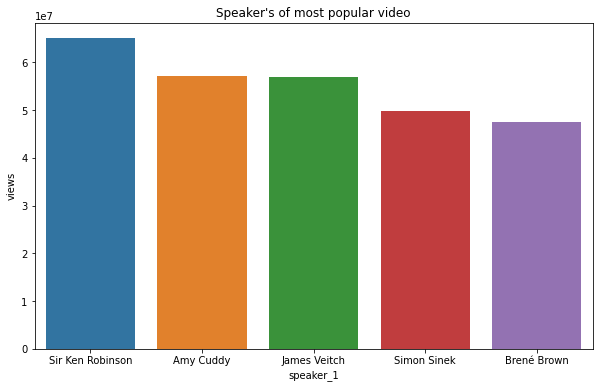

In [13]:
#plotting Speaker's of most popular video
plt.figure(figsize=(10,6))
plt.title("Speaker's of most popular video")
sns.barplot(x='speaker_1',y='views', data=pop_df)

* Sir Ken Robinson's talk on "Do Schools Kill Creativity?" is the most popular TED Talk of all time with more than 65 million views.

* It is closely followed by Amy Cuddy talk on "Your body language may shape who you are" with more than 57 million views.

* There is only one talk that has crossed 60 million mark while 3 talks have crossed 50 million mark.

**Finding most popular speaker**

In [14]:
#finding most popular speaker from the dataset
pop_speaker_df=df.groupby('speaker_1').agg({'views' : 'sum'}).nlargest(15,['views'])
pop_speaker_df.reset_index(inplace=True)
pop_speaker_df

,speaker_1,views
0,Alex Gendler,117619583
1,Sir Ken Robinson,84380518
2,James Veitch,78843641
3,Simon Sinek,62661183
4,Brené Brown,61285977
5,Bill Gates,57107176
6,Amy Cuddy,57074270
7,Julian Treasure,54799681
8,Hans Rosling,39871561
9,Tim Urban,37976820


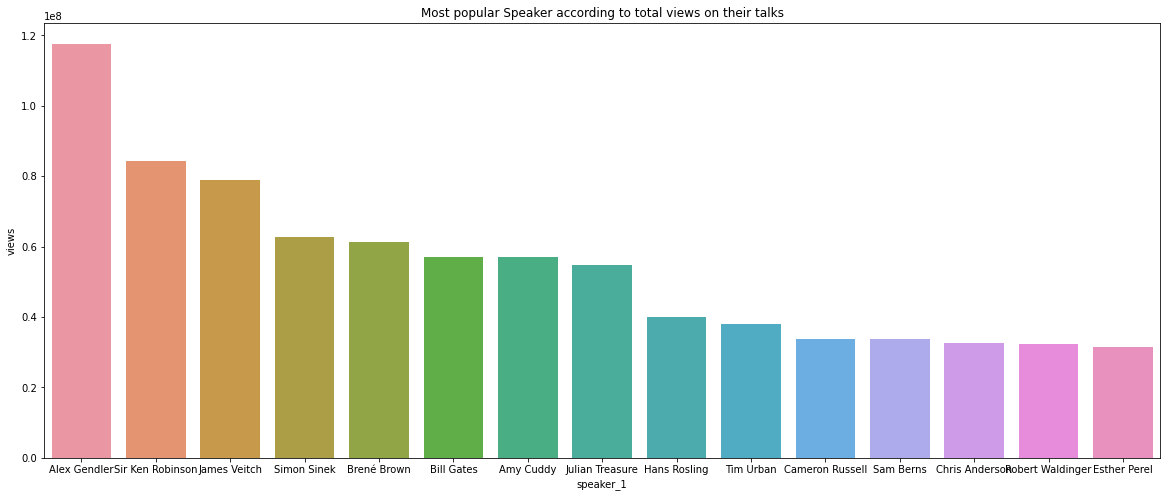

In [15]:
#printing most popular Speaker according to total views on their talks
plt.figure(figsize=(20,8))
plt.title('Most popular Speaker according to total views on their talks')
sns.barplot(x='speaker_1',y='views', data=pop_speaker_df)

**Alex Gendler is the most popular speaker followed by Sir Ken Robinson**

**3.3 Exploring the event column**

Check for unique event category in event column.

In [16]:
#printing the len of unique values in event column
len(df.event.unique())

459

We have 459 unique entries in event column

In [17]:
#finding the most frequent event categories
freq_event_df=df[['event','views']].groupby('event').agg({'views' : 'count'}).nlargest(10,['views'])
freq_event_df.reset_index(inplace=True)
freq_event_df

,event,views
0,TED-Ed,556
1,TED2017,96
2,TED2018,96
3,TED2019,91
4,TED2014,84
5,TED2009,81
6,TED2013,75
7,TED2015,75
8,TED2016,75
9,TED2011,70


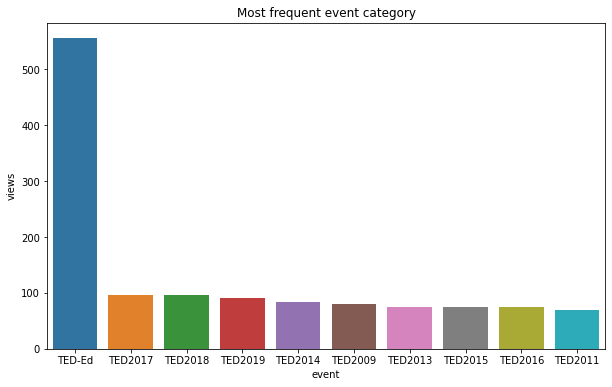

In [18]:
#plotting Most frequent event category
plt.figure(figsize=(10,6))
plt.title('Most frequent event category')
sns.barplot(x='event',y='views',data=freq_event_df)

**TED-Ed is the most frequent event category with 556 entries followed by TED2017 and TED2018**

**Exploring the most popular event category**

In [19]:
#finding the most popular event categories
pop_event_df=df[['event','views']].groupby('event').agg({'views' : 'sum'}).nlargest(10,['views'])
pop_event_df.reset_index(inplace=True)

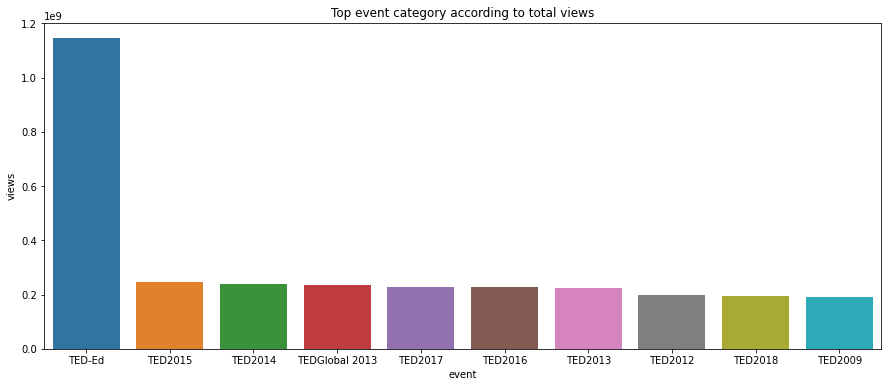

In [20]:
#plotting the Top event category according to total views
plt.figure(figsize=(15,6))
plt.title('Top event category according to total views')
sns.barplot(x='event',y='views',data=pop_event_df)

TED-Ed is the most popular event category having maximum number of total views followed by TED2015

**3.4 Exploring native_lang column**

In [21]:
#printing the value counts of native_lang column
df.native_lang.value_counts()

en       3957
es         27
fr          9
ja          3
hi          2
de          1
pt          1
ko          1
zh-cn       1
ar          1
pt-br       1
it          1
Name: native_lang, dtype: int64

* Here, approx 99% values in native_lang column is en.

* So, this column will not impact much and of no use to us and we can simply remove it.

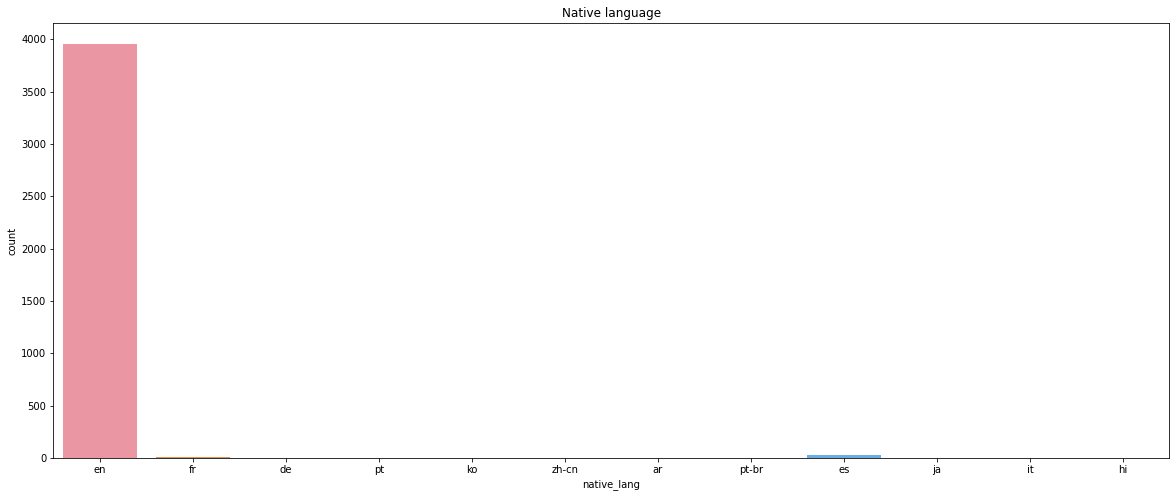

In [23]:
#plotting the countplot of native_lang column
plt.title('Native language')
sns.countplot(df['native_lang'])

In [24]:
#Dropping the native_lang column
df.drop(columns='native_lang',inplace=True)

**3.5 Exploring the title column and visualizing the most frequent words in title.**

In [25]:
#importing the wordcloud
from wordcloud import WordCloud,ImageColorGenerator

There are 157160 words in the combination of all titles.


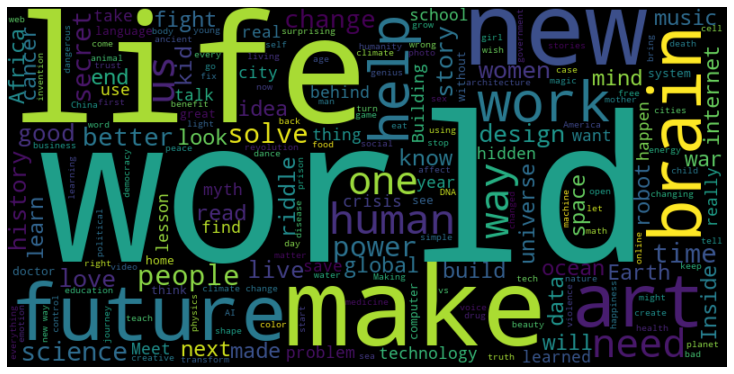

In [28]:
#making of word cloud from title column
text = " ".join(topic for topic in df.title.astype(str))
print ("There are {} words in the combination of all titles.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="black", width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (15,5)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

Majoriity of Titles contains words like life, world, make, new, future, art.

**3.6 Visualizing most popular topic tags with word cloud**

There are 404126 words in the combination of all topics.


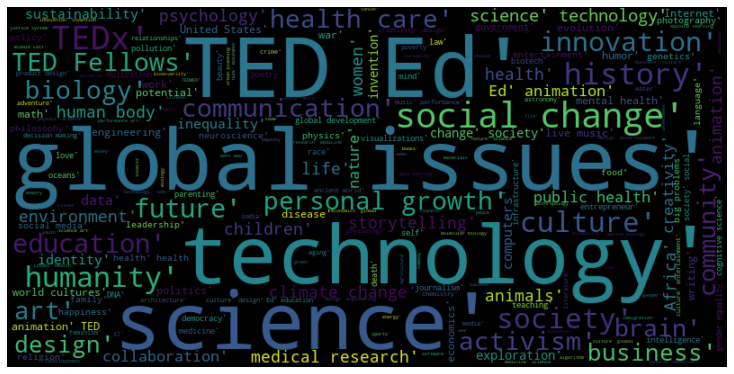

In [27]:
from wordcloud import WordCloud,ImageColorGenerator
text = " ".join(topic for topic in df.topics.astype(str))
print ("There are {} words in the combination of all topics.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="black", width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (15,5)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

Majority of topic tags contain words like technology, global, science, issues, social change.

**3.7 Exploring occupation column.**

In [29]:
df['occupations'][0]

"{0: ['climate advocate']}"

In [30]:
#counting for null values in occupations column
df['occupations'].isna().sum()

522

* We have 522 Nan values in occupations column.

* Let's replace those NaN values with another category called 'other'.

In [31]:
#replacing Nan values of occupations column with other 
for index, row in df.iterrows():
    if pd.isnull(row['occupations']):
        df['occupations'][index] = str({0:'Other'})

In [32]:
#applying eval function on occupations column
df['occupations'] = df.apply(lambda row: eval(row['occupations']), axis=1)

In [33]:
#defining a new feature called occupation
df['occupation'] = 'other'
#iterating through the each row and extracting occupations of speakers
for index, row in df.iterrows():
    occup_list=list(row['occupations'].values())[0][0]
    df.loc[index,'occupation'] = str(occup_list)

In [34]:
#Checking the length of unique occupation in event column.
len(df['occupation'].unique())

1552

[Text(0.5, 1.0, "top 15 most frequent speaker's occupations")]

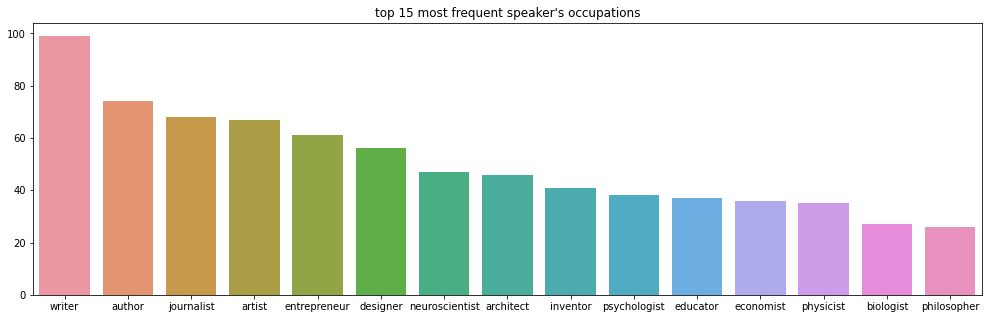

In [35]:
#Printing the top 15 most frequent speaker's occupations
occ_df=df[df['occupation']!='O']
fig,ax=plt.subplots(figsize=(17,5))
a=sns.barplot(x=occ_df['occupation'].value_counts(ascending=False).head(15).index, 
              y=occ_df['occupation'].value_counts(ascending=False).head(15).values, ax=ax)
a.set(title="top 15 most frequent speaker's occupations")

In [36]:
#printing the value_counts of occupation column
occ_df['occupation'].value_counts().head(8)

writer            99
author            74
journalist        68
artist            67
entrepreneur      61
designer          56
neuroscientist    47
architect         46
Name: occupation, dtype: int64

Most of the speakers are writer folowed by author and journalist.

**Making the world cloud for occupations column** 

There are 55651 words in the combination of all occupations.


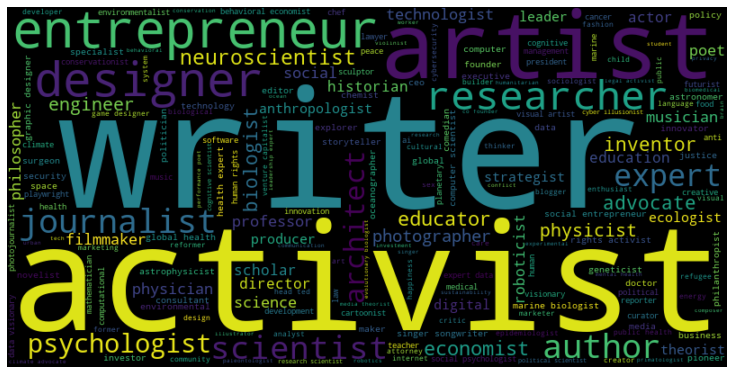

In [37]:
#joining the texts
text = " ".join(occ for occ in occ_df.occupation.astype(str))
print ("There are {} words in the combination of all occupations.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="black", width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (15,5)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

**3.8 Exploring published_date column**

In [38]:
#applying strptime on published_date column
import datetime
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d"))

In [39]:
#extracting release day, month and year from the published date column
df['release_day'] = df['published_date'].apply(lambda x: x.weekday())
df['release_month']=df['published_date'].apply(lambda x: x.month)
df['release_year'] = df['published_date'].apply(lambda x: x.year)

Extracted weekday month and year from published_date column and added three separate columns as:

* release_day

* release_month

* release_year

In [40]:
#encoding of release_day column with corresponding week day name
week_day={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df['release_day']=df['release_day'].map(week_day)

**Exploring release_day column.**

Checking the most frequent release day of the week.

In [41]:
#checking the day of the month having maximum release date 
freq_rel_day=df[['release_day','views']].groupby('release_day').agg({'views' : 'count'})
freq_rel_day=freq_rel_day.sort_values('views',ascending=False)
freq_rel_day.reset_index(inplace=True)
freq_rel_day

,release_day,views
0,Tuesday,857
1,Thursday,832
2,Friday,789
3,Monday,727
4,Wednesday,703
5,Sunday,55
6,Saturday,42


Text(0.5, 1.0, 'Most frequent release days')

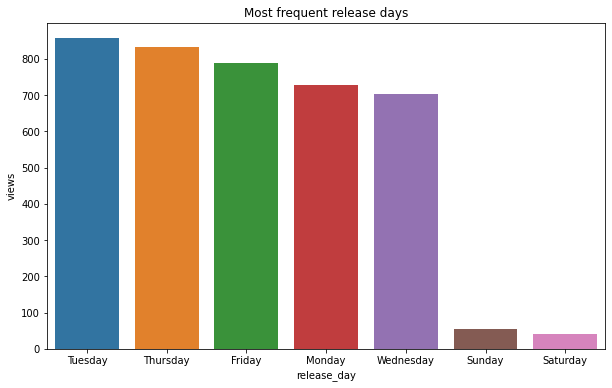

In [42]:
# ploting the day of the week having maximum release date 
plt.figure(figsize=(10,6))
sns.barplot(x='release_day',y='views',data=freq_rel_day)
plt.title('Most frequent release days')

Checking the best release day of the week with respect to average views

In [43]:
pop_rel_day=df[['release_day','views']].groupby('release_day').agg({'views' : 'mean'})
pop_rel_day=pop_rel_day.sort_values('views',ascending=False)
pop_rel_day.reset_index(inplace=True)

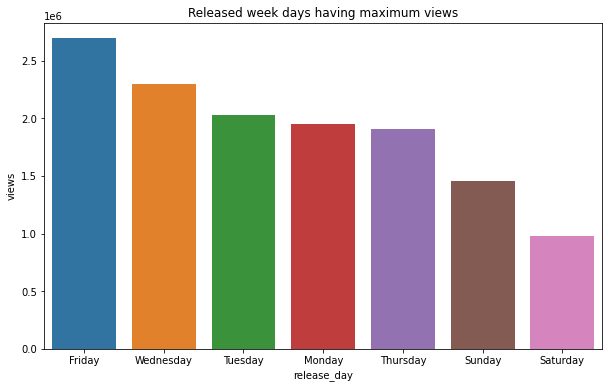

In [44]:
#Plotting the best release day with respect toaverage views
plt.figure(figsize=(10,6))
plt.title('Released week days having maximum views')
sns.barplot(x='release_day',y='views',data=pop_rel_day)

* Most videos are published on Tuesday followed by Thursday.

* But the videos published on Friday are more popular (i.e. have more average views) followed by wednesday.

* Friday release is impacting the views of the video

**Exploring release_month column**

In [45]:
#encoding of release_month column with corresponding month name
month_dict={1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df['release_month']=df['release_month'].map(month_dict)

Text(0.5, 1.0, 'Most frequent release months')

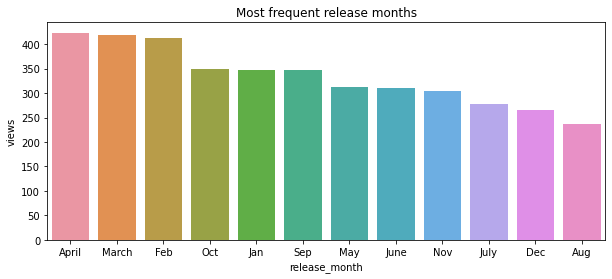

In [47]:
#checking months having maximum release 
freq_rel_month=df[['release_month','views']].groupby('release_month').agg({'views' : 'count'})
freq_rel_month=freq_rel_month.sort_values('views',ascending=False)
freq_rel_month.reset_index(inplace=True)

# plotting the months having maximum release 
plt.figure(figsize=(10,4))
sns.barplot(x='release_month',y='views',data=freq_rel_month)
plt.title('Most frequent release months')

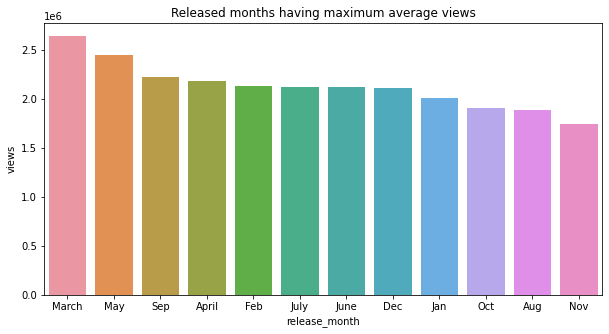

In [48]:
#Printing the most popular release month according to average Views
pop_rel_month=df[['release_month','views']].groupby('release_month').agg({'views' : 'mean'})
pop_rel_month=pop_rel_month.sort_values('views',ascending=False)
pop_rel_month.reset_index(inplace=True)

plt.figure(figsize=(10,5))
plt.title('Released months having maximum average views')
sns.barplot(x='release_month',y='views',data=pop_rel_month)

April have maximum released videos, but the videos released in March are more popular (i.e. have more average views) followed by May and Sep.

**Exploring release_year column.**

Text(0.5, 1.0, 'Most frequent release years')

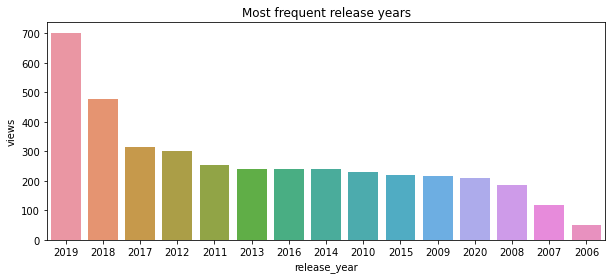

In [61]:
#checking years having maximum release 
freq_rel_year=df[['release_year','views']].groupby('release_year').agg({'views' : 'count'})
freq_rel_year=freq_rel_year.sort_values('views',ascending=False)
freq_rel_year.reset_index(inplace=True)

#Plotting the years having maximum release 
plt.figure(figsize=(10,4))
sns.barplot(x='release_year',y='views',data=freq_rel_year, order=freq_rel_year.sort_values('views',ascending = False).release_year)
plt.title('Most frequent release years')

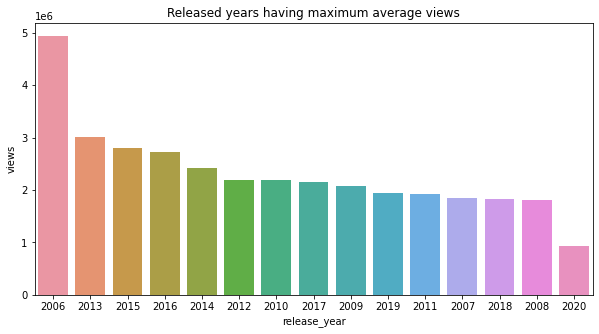

In [60]:
#Printing the most popular release years according to average views
pop_rel_year=df[['release_year','views']].groupby('release_year').agg({'views' : 'mean'})
pop_rel_year=pop_rel_year.sort_values('views',ascending=False)
pop_rel_year.reset_index(inplace=True)

plt.figure(figsize=(10,5))
plt.title('Released years having maximum average views')
sns.barplot(x='release_year',y='views', data=pop_rel_year, order=pop_rel_year.sort_values('views',ascending = False).release_year)

Most videos are published in 2019 followed by 2018 and 2017.

But the videos published in 2006 are most viewed followed by 2013 and 2015.